# Model 000 basic

### Charlie working on

This model has stream power and linear diffusion of the forms:
$$\frac{d\eta}{dt}=-KA^mS^n$$
and
$$\frac{d\eta}{dt} = -D\nabla^2\eta$$

So, at steady state, the landscape will obey:
$$S=\left(\frac{U}{KA^m}\right)^{1/n}$$
when only the fluvial rule is in place ($D=0$) and:
$$\eta = -\frac{U}{D}\frac{x^2}{2}+\frac{U}{D}\frac{L^2}{2}$$
when only the hillslope rules are in place ($K=0$).

In [1]:
from erosion_model import Basic
import numpy as np
import matplotlib.pyplot as plt
#from landlab import RasterModelGrid
#from landlab.components import DepressionFinderAndRouter
#from landlab.components.flow_routing import FlowRouter
#from landlab.components import FastscapeEroder
#from landlab.components import LinearDiffuser
from landlab import imshow_grid

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


### There will be two parts: 1) turn off channels and just do hillslopes, and 2) turn off hillslopes and just do channels. Both will start as flat+noise

### Part 1: turn off channels and just do hillslopes

In [2]:
#parameter dictionary
params = { 'number_of_node_rows' : 10,
          'number_of_node_columns' : 100,
          'node_spacing' : 10.0,
          'east_boundary_closed' : False,
          'north_boundary_closed' : True,
          'west_boundary_closed' : False,
          'south_boundary_closed' : True,
          'dt' : 10.0,
          'K_sp' : 0,
          'm_sp' : 0.5,
          'n_sp' : 1.0,
          'linear_diffusivity' : 1.0,
          'outlet_lowering_rate' : 0.0005,
          'output_filename': 'model_000_output'
}

In [3]:
basic = Basic(params=params)
#channel_erodibility = 0 #m/yr
#hillslope_diffusivity = 1. #m^2/yr
#uplift_rate = 0.001 #m/yr
tolerance = 0.0001

#run_time = 100000 #years
#dx = 1.0
#dt = 10. #year
#nr = 10
#nc = 100
#mg = RasterModelGrid((nr, nc), dx)
#np.random.seed(seed = 5000)
#mg.add_zeros('node', 'topographic__elevation')

#mg['node']['topographic__elevation'] += np.random.rand(len(mg.node_y)) / 10000
#ld = LinearDiffuser(mg, linear_diffusivity = hillslope_diffusivity)

#%matplotlib inline
#imshow_grid(mg, 'topographic__elevation')

In [4]:
#basic.grid.set_closed_boundaries_at_grid_edges(bottom_is_closed=True,left_is_closed=False,right_is_closed=False,top_is_closed=True)
dt = 10
#basic.run_for(1, 100000)
#K_ss = None
#print K_ss
elapsed_time = 0 #years
keep_running = True
while keep_running == True:
    pre_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    basic.run_one_step(dt)
    #    ld.run_one_step(dt = dt)
    #basic.grid.at_node['topographic__elevation'][basic.grid.boundary_nodes] -= uplift_rate * dt
    post_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    if elapsed_time % 1000 == 0:
        print elapsed_time
        print max(abs(pre_topo - post_topo))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False

0
0.238840127357
1000
0.00544516203626
2000
0.00506753018654
3000
0.0050245662997
4000
0.00500961237792
5000
0.00500375032311
6000
0.00500101983678
7000
0.00499927939974
8000
0.00499758276291
9000
0.00499499818358
10000
0.00499096012924
11000
0.00498514759406
12000
0.00497733414735
13000
0.00496737734955
14000
0.00495520690206
15000
0.00494081194051
16000
0.0049242285729
17000
0.00490552849872
18000
0.00488480914833
19000
0.00486218547296
20000
0.0048377833221
21000
0.00481173424374
22000
0.00478417150291
23000
0.00475522711017
24000
0.00472502966705
25000
0.00469370285979
26000
0.00466136445878
27000
0.00462812570674
28000
0.00459409100082
29000
0.0045593577935
30000
0.00452401665306
31000
0.00448815143782
32000
0.00445183954839
33000
0.0044151522314
34000
0.00437815491388
35000
0.00434090755341
36000
0.00430346499276
37000
0.00426587731091
38000
0.00422819016489
39000
0.00419044511837
40000
0.00415267995471
41000
0.00411492897274
42000
0.00407722326477
43000
0.00403959097648
44000
0.

In [ ]:
basic.grid.open_boundary_nodes
max(abs(pre_topo - post_topo))
#%matplotlib inline
#imshow_grid(basic.grid, 'topographic__elevation')

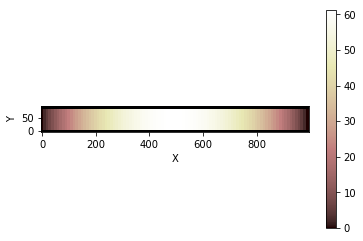

In [9]:
%matplotlib inline
imshow_grid(basic.grid, 'topographic__elevation')

In [16]:
import matplotlib
from matplotlib import ticker
#
topo = basic.grid.at_node['topographic__elevation']


#plotting param
matplotlib.rcParams.update({'font.size': 16})

# #instantiate figure and plot
topo_fig = plt.figure(figsize=(6, 1))
t1 = plt.subplot()
topo = topo.reshape(10,100)
ts1_plot = t1.imshow(topo[::-1], cmap='terrain', vmin = 0, vmax = 60)

#add colorbar
cb = plt.colorbar(ts1_plot, label = 'Elevation [m]')
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()

#axis labels
t1.tick_params(labelbottom='off', labelleft='off') 
t1.set_ylabel('100 m', labelpad = 15)
t1.set_xlabel('1 km side length', labelpad = 15)

#save figure
topo_fig.savefig('linear_diffusion_topo.eps',bbox_inches='tight', dpi=300)


In [10]:
basic.grid.open_boundary_nodes
basic.outlet_node
print basic.grid.at_node['topographic__elevation'][1]

0.0


In [6]:
uplift_rate = 0.0005
hillslope_diffusivity = 1.0
dx = 10.0
topo_profile = basic.grid.at_node['topographic__elevation'][basic.grid.node_y == 50]
domain = np.arange(0, max(basic.grid.node_x + dx), dx)
plt.plot(domain, topo_profile)
x = np.arange(-max(domain) / 2., max(domain) / 2. + dx, dx)
theory_profile = (uplift_rate / hillslope_diffusivity) * ((max(x+max(x))/2.)**2 / 2.0) + ((-uplift_rate / hillslope_diffusivity) * (x**2 / 2.0))
plt.plot(x + max(x), theory_profile , linestyle='--')
#print topo_profile
#print theory_profile
#print x
#print domain
#print max(x+max(x))
#print uplift_rate

In [7]:
import matplotlib
#define "domain" and "topo"
topo = basic.grid.at_node['topographic__elevation'][basic.grid.node_y == 50]
domain = np.arange(0, max(basic.grid.node_x + dx), dx)

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
hillslope = plt.subplot()

#plotting param
matplotlib.rcParams.update({'font.size': 20})

#parameters
uplift_rate = 0.0005
hillslope_diffusivity = 1.0

#plot the actual profile
hillslope.plot(domain / 1000, topo, marker='o', c='k', linewidth = 0, markerfacecolor='None', label = 'Numerical Solution')

#plot the theoretical profile
x = np.arange(-max(domain) / 2., max(domain) / 2. + dx, dx)
theory_profile = (uplift_rate / hillslope_diffusivity) * \
    ((max(x+max(x))/2.)**2 / 2.0) + ((-uplift_rate / hillslope_diffusivity) *\
    (x**2 / 2.0))
plt.plot((x + max(x)) / 1000, theory_profile , linestyle='-', c='grey', linewidth = 2, label = 'Analytical Solution')

#axis labels
hillslope.set_xlabel('Distance [km]')
hillslope.set_ylabel('Elevation [m]')

#legend
hillslope.legend(scatterpoints = 1, prop={'size':12})

#save figure
fig.savefig('basic_lin_diff_topo.eps',bbox_inches='tight', dpi=300)

Linear hillslope diffusion: check!!

### Part 2: turn off hillslopes and just do channels

In [2]:
#parameter dictionary (diffusivity will be 0, K_sp is nonzero)
params = { 'number_of_node_rows' : 100,
          'number_of_node_columns' : 160,
          'node_spacing' : 10.0,
          'east_boundary_closed' : False,
          'north_boundary_closed' : False,
          'west_boundary_closed' : False,
          'south_boundary_closed' : False,
          'dt' : 10.0,
          'K_sp' : 0.001,
          'm_sp' : 0.5,
          'n_sp' : 1.0,
          'linear_diffusivity' : 10e-20,
          'outlet_lowering_rate' : 0.0005,
          'output_filename': 'model_000_output'
}

In [3]:
#instantiate and establish topo error tolerance
basic = Basic(params=params)
tolerance = 0.0001

In [4]:
#time loop
dt = 10
elapsed_time = 0 #years
keep_running = True
while keep_running == True:
    pre_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    basic.run_one_step(dt)
    #    ld.run_one_step(dt = dt)
    #basic.grid.at_node['topographic__elevation'][basic.grid.boundary_nodes] -= uplift_rate * dt
    post_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    if elapsed_time % 1000 == 0:
        print elapsed_time
        print max(abs(pre_topo - post_topo))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False

0
0.110402897793
1000
0.00499999213367
2000
0.0140103065803
3000
0.00971873562702
4000
0.0165986439269
5000
0.00875880125218
6000
0.00844412936257
7000
0.00832402521959
8000
0.00805557627614
9000
0.00854081409742
10000
0.00968405125191
11000
0.00859297347634
12000
0.00924032116592
13000
0.00902067644707
14000
0.00778265565369
15000
0.0150707779176
16000
0.00855560631831
17000
0.0105931353659
18000
0.0183087302037
19000
0.0155834440317
20000
0.00928163052506
21000
0.00916559964483
22000
0.00842166931802
23000
0.0204554444599
24000
0.0109147677451
25000
0.0064359543018
26000
0.0194232392189
27000
0.00844174423659
28000
0.00890905571216
29000
0.00885663321343
30000
0.00992529388268
31000
0.0114191374593
32000
0.0143917921197
33000
0.0130020620026
34000
0.00825964557092
35000
0.00705557632791
36000
0.00861083724575
37000
0.008779964725
38000
0.00797428103686
39000
0.00678203121417
40000
0.00547158826462
41000
0.038148351301
42000
0.00895636554133
43000
0.0122607853631
44000
0.0063100247012

NameError: name 'pre_topo' is not defined

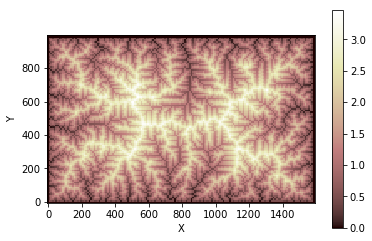

In [5]:
%matplotlib inline
imshow_grid(basic.grid, 'topographic__elevation')

In [6]:
print basic.grid['node']['topographic__elevation'][300:450]
print keep_running
#basic.grid.open_boundary_nodes

[ 0.0505      0.03585534  0.03585534  0.0255      0.0505      0.0505
  0.0505      0.01070621  0.0505      0.0505      0.0505      0.01116004
  0.0505      0.03585534  0.0505      0.02091241  0.0505      0.0505
  0.0505      0.          0.          0.03585534  0.08585534  0.08585534
  0.08138696  0.03138696  0.08138696  0.08585534  0.08189673  0.03189673
  0.04115263  0.08299579  0.08585534  0.06937447  0.01937447  0.05706532
  0.02180952  0.07180952  0.08585534  0.09621068  0.06085534  0.08585534
  0.05172819  0.09357136  0.07305243  0.05234177  0.00495175  0.05495174
  0.08585534  0.08585534  0.08083318  0.0601225   0.02455626  0.07455626
  0.06430178  0.01430178  0.06430178  0.08585534  0.08585534  0.06085534
  0.09621068  0.08585534  0.06259359  0.01259359  0.04080608  0.07616142
  0.088055    0.038055    0.00918749  0.05918749  0.0755      0.0755
  0.06472285  0.08000932  0.03000932  0.08000932  0.05172819  0.09357136
  0.05686878  0.00686875  0.05313159  0.07384234  0.08585534  0

0.00505


(0.0003, 0.01)

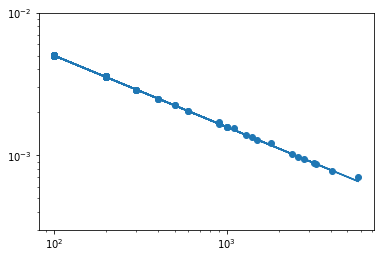

In [9]:
print basic.grid.at_node['topographic__steepest_slope'][235]
#for some reason, the line of nodes adjacent to all the boundaries
plt.scatter(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], basic.grid.at_node['topographic__steepest_slope'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)])
plt.plot(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], (0.0005 / 0.01)*np.power(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], -0.5))
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0003, 0.01)

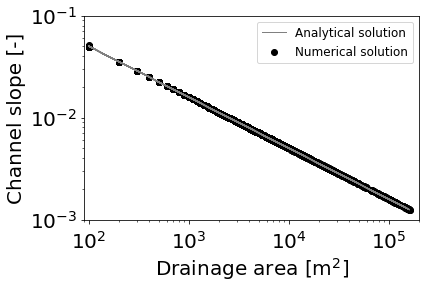

In [13]:
###MAKE SLOPE-AREA PLOT

import matplotlib

#assign area_array and slope_array
area_array = basic.grid.at_node['drainage_area'][(basic.grid.node_x > 10)&(basic.grid.node_x < 1580)&(basic.grid.node_y >10)&(basic.grid.node_y<980)]
slope_array = basic.grid.at_node['topographic__steepest_slope'][(basic.grid.node_x > 10)&(basic.grid.node_x < 1580)&(basic.grid.node_y >10)&(basic.grid.node_y<980)]

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
slope_area = plt.subplot()

#plotting param
matplotlib.rcParams.update({'font.size': 20})

#create an array for the detachment-limited analytical solution
u = 0.0005 #m/yr, uplift or baselevel lowering rate
k = 0.001 #fluvial erodibility
m = 0.5 #discharge exponent
n = 1.0 #slope exponent

#calculate analytical slope from area field
analytical_slope_array = np.power((u / k), 1 / n) * np.power(area_array, -m/n)

#plot the analytical solution
slope_area.plot(area_array, analytical_slope_array, linestyle='-',
                color='grey', linewidth = 1, label = 'Analytical solution')

#plot the data
slope_area.scatter(area_array, slope_array, marker='o', c='k', 
                   label = 'Numerical solution') #plot HA data
                   
#make axes log and set limits
slope_area.set_xscale('log')
slope_area.set_yscale('log')

slope_area.set_xlim(9*10**1, 2*10**5)
slope_area.set_ylim(1e-3, 1e-1)

#set x and y labels
slope_area.set_xlabel(r'Drainage area [m$^2$]')
slope_area.set_ylabel('Channel slope [-]')
slope_area.legend(scatterpoints=1,prop={'size':12})
slope_area.tick_params(axis='x', which='major', pad=7)

fig.savefig('basic_streampower_slope_area.eps',bbox_inches='tight', dpi=1000) #save figure

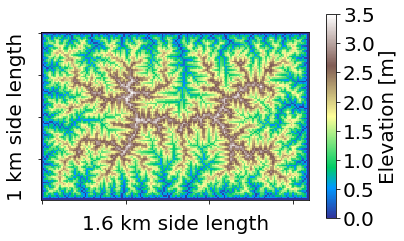

In [7]:
##MAKE TOPO FIGURE
#define 'topo'
topo = basic.grid.at_node['topographic__elevation']
#plotting param
matplotlib.rcParams.update({'font.size': 20})

# #instantiate figure and plot
topo_fig = plt.figure(figsize=(6, 3.75))
t1 = plt.subplot()
topo = topo.reshape(100,160)
ts1_plot = t1.imshow(topo[::-1], cmap='terrain', vmin = 0, vmax = 3.5)

#add colorbar
cb = plt.colorbar(ts1_plot, label = 'Elevation [m]')

#axis labels
t1.tick_params(labelbottom='off', labelleft='off') 
t1.set_ylabel('1 km side length', labelpad = 15)
t1.set_xlabel('1.6 km side length', labelpad = 15)

#save figure
topo_fig.savefig('basic_streampower_topo.eps',bbox_inches='tight', dpi=300)

In [13]:
from landlab.io.netcdf import write_netcdf
write_netcdf('basic_stream_power.nc', basic.grid, format='NETCDF3_64BIT', names='topographic__elevation')

In [10]:
area_array

array([ 4800.,  4700.,  4600.,  4500.,  4400.,  4300.,  4200.,  4100.,
        4000.,  3900.,  3800.,  3700.,  3600.,  3500.,  4800.,  4700.,
        4600.,  4500.,  4400.,  4300.,  4200.,  4100.,  4000.,  3900.,
        3800.,  3700.,  3600.,  3500.,  4800.,  4700.,  4600.,  4500.,
        4400.,  4300.,  4200.,  4100.,  4000.,  3900.,  3800.,  3700.,
        3600.,  3500.,  4800.,  4700.,  4600.,  4500.,  4400.,  4300.,
        4200.,  4100.,  4000.,  3900.,  3800.,  3700.,  3600.,  3500.,
        4800.,  4700.,  4600.,  4500.,  4400.,  4300.,  4200.,  4100.,
        4000.,  3900.,  3800.,  3700.,  3600.,  3500.,  4800.,  4700.,
        4600.,  4500.,  4400.,  4300.,  4200.,  4100.,  4000.,  3900.,
        3800.,  3700.,  3600.,  3500.,  4800.,  4700.,  4600.,  4500.,
        4400.,  4300.,  4200.,  4100.,  4000.,  3900.,  3800.,  3700.,
        3600.,  3500.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.])